# Predict the onset of diabetes based on diagnostic measures

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Kaggle link: [Click here to access the Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In this study I aim to use Support Vector Classifier Model with a Linear kernel to predict probabilities of developing diabetes in the future based in the measures below.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). *Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care* (pp. 261--265). IEEE Computer Society Press.

# 1. Data Loading

Start importing usual libraries...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Reading CSV dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As we are not interested in use Pedigree Function, because it´s not a wide known used measure in Brazil, we will drop this variable


In [ ]:
del df['DiabetesPedigreeFunction']

# 1.1 Exploratory Data Analysis

By just looking at the head of the dataset one can clearly see that there´s a lot of zeros on variables. It would be quite impressive to have a patient alive with Blood Pressure = 0. And it would also be as impressive to see one with Insulin = 0. It indicates that even if the dataset does not contain Nan values, it does surely contain missing data

In [ ]:
print ('Missing Blood Pressure values: ', len(df[df.BloodPressure == 0]))

Missing Blood Pressure values:  35


In [ ]:
print ('Missing Insulin values: ', len(df[df.Insulin == 0]))

Missing Insulin values:  374


In [ ]:
print ('Missing Glucose values: ', len(df[df.Glucose == 0]))

Missing Glucose values:  5


In [ ]:
print ('Missing BMI values: ', len(df[df.BMI == 0]))

Missing BMI values:  11


In [ ]:
print ('Missing SkinThickness values: ', len(df[df.SkinThickness == 0]))

Missing SkinThickness values:  227


# 1.2 Data Imputation

Let´s imput the missing values for crucial variables on the dataset. Starting with Blood Pressure, I´ll impute zero samples using the mean of the Blood Pressure

In [ ]:
df1 = df[df.Outcome == 1] 
df2 = df[df.Outcome == 0]

In [ ]:
df1 = df1.replace({'BloodPressure': 0}, np.mean(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure': 0}, np.mean(df2['BloodPressure']))

In [ ]:
dataset = [df1, df2]
df = pd.concat(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72.0,35,100.335821,33.6,50,1
2,8,183,64.0,0,100.335821,23.3,32,1
4,0,137,40.0,35,168.000000,43.1,33,1
6,3,78,50.0,32,88.000000,31.0,26,1
8,2,197,70.0,45,543.000000,30.5,53,1


The same proccess to Insulin...

In [ ]:
df1 = df[df.Outcome == 1] 
df2 = df[df.Outcome == 0]

df1 = df1.replace({'Insulin': 0}, np.mean(df1['Insulin']))
df2 = df2.replace({'Insulin': 0}, np.mean(df2['Insulin']))

In [ ]:
dataset = [df1, df2]
df = pd.concat(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72.0,35,100.335821,33.6,50,1
2,8,183,64.0,0,100.335821,23.3,32,1
4,0,137,40.0,35,168.000000,43.1,33,1
6,3,78,50.0,32,88.000000,31.0,26,1
8,2,197,70.0,45,543.000000,30.5,53,1


Now for SkinThickness, BMI and Glucose...

In [ ]:
# SkinThickness imputing...
df1 = df[df.Outcome == 1] 
df2 = df[df.Outcome == 0]

df1 = df1.replace({'SkinThickness': 0}, np.mean(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness': 0}, np.mean(df2['SkinThickness']))

dataset = [df1, df2]
df = pd.concat(dataset)

# BMI imputing...
df1 = df[df.Outcome == 1] 
df2 = df[df.Outcome == 0]

df1 = df1.replace({'BMI': 0}, np.mean(df1['BMI']))
df2 = df2.replace({'BMI': 0}, np.mean(df2['BMI']))

dataset = [df1, df2]
df = pd.concat(dataset)

# Finally, Glucose imputing...
df1 = df[df.Outcome == 1] 
df2 = df[df.Outcome == 0]

df1 = df1.replace({'Glucose': 0}, np.mean(df1['Glucose']))
df2 = df2.replace({'Glucose': 0}, np.mean(df2['Glucose']))

dataset = [df1, df2]
df = pd.concat(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,50,1
2,8,183.0,64.0,22.164179,100.335821,23.3,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,53,1


In [ ]:
print ('Missing Blood Pressure values: ', len(df[df.BloodPressure == 0]))
print ('Missing Insulin values: ', len(df[df.Insulin == 0]))
print ('Missing Glucose values: ', len(df[df.Glucose == 0]))
print ('Missing BMI values: ', len(df[df.BMI == 0]))
print ('Missing SkinThickness values: ', len(df[df.SkinThickness == 0]))

Missing Blood Pressure values:  0
Missing Insulin values:  0
Missing Glucose values:  0
Missing BMI values:  0
Missing SkinThickness values:  0


<b>Hard Work done!</b>

# 2. Exploratory Data Analysis on Outcome
Despite all the EDA done before, It´s relevant to check if the target is imbalanced

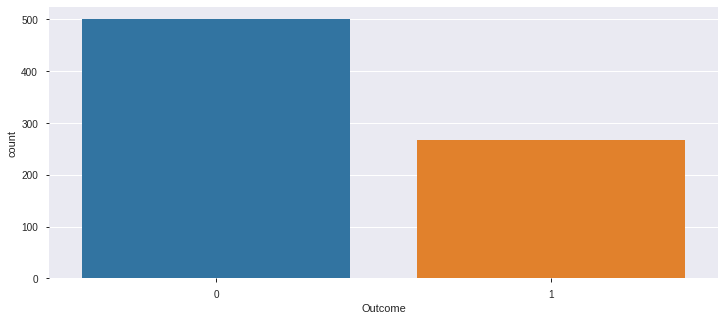

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df.Outcome);

# 3. Resampling Dataset

As seen above, we´ve an imbalanced dataset, thus, we must preprocess Outcome target variable before stressing any Machine Learning model on it. We can use a bunch of different techniques of <b>Oversampling and Undersampling</b> to solve imbalance:


1.   Undersampling the majority Outcome
2.   Random Oversampling minority class
3.   <b>SMOTE</b> - *Synthetic Minority Oversampling Technique*

For this special case, as the dataset is pretty small, I choose SMOTE method to oversample the minority target.





Before that, let´s really confirm the amount of imbalance present in this dataset. 

In [ ]:
positive = df[df.Outcome == 1]
negative = df[df.Outcome == 0]

In [ ]:
print ('Negative proportion:', len(negative)/len(df)*100, '%')
print ('Positive proportion:', len(positive)/len(df)*100, '%')

Negative proportion: 65.10416666666666 %
Positive proportion: 34.89583333333333 %


# 4. Splitting Dataset into training and test sets

From the above proportions, the dataset is undoubtedly imbalanced. Let´s apply SMOTE method

In [ ]:
from sklearn.model_selection import train_test_split as tts

We must always split the dataset onto train and test sets even before we resample with any method described before. That´s because we only want to train the model with an equal-proportion target variable. With the validation and test sets, the model must be able to identify correctly between the two classes instead of being imbalanced or not.

In [ ]:
X_train, X_test, y_train, y_test = tts(df.drop('Outcome', axis = 1), df.Outcome, test_size=.1, random_state=101)

# 5. Applying SMOTE Method on Training Set

After splitting, we´re able to resample the training set in a way that using SMOTE technique, the result will be a dataset with equal proportion of 1 and 0 Outcomes

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42, ratio = 1.0)

In [ ]:
X_res, y_res = smk.fit_sample(X_train, y_train)

Now I´m going to convert X_resampled in a dataframe to ensure that we did not get any error during resampling process...

In [ ]:
X_res = pd.DataFrame(X_res, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'])
X_res.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,3.0,125.0,58.0,19.664000,68.792000,31.6,24.0
1,4.0,148.0,60.0,27.000000,318.000000,30.9,29.0
2,5.0,144.0,82.0,26.000000,285.000000,32.0,58.0
3,5.0,88.0,66.0,21.000000,23.000000,24.4,30.0
4,8.0,133.0,72.0,22.164179,100.335821,32.9,39.0


Analogous with y training resampled dataset...

In [ ]:
y_res = pd.DataFrame(y_res, columns = ['Outcome'])
y_res.head()

,Outcome
0,0
1,1
2,1
3,0
4,1


Let´s check below the proportion of values after resampling the training set.

Outcome = 1 proportion: 50 %
--------------------------------------------------


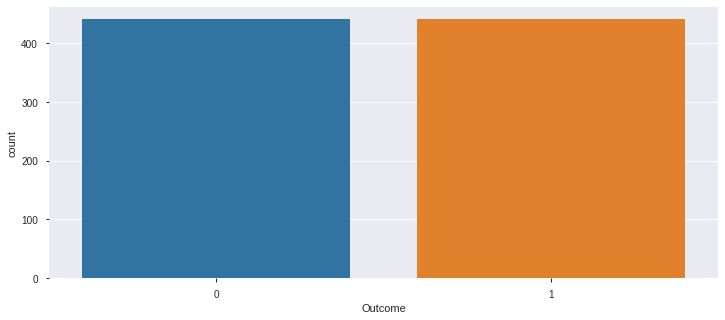

In [ ]:
print ('Outcome = 1 proportion:',int(y_res.sum()/len(y_res)*100),'%')
print('-'*50)
plt.figure(figsize=(12,5))
sns.countplot(y_res.Outcome);

# 6. Standardizing Inputs

We´ll also need to take note of independent variables. As they´re in different ranges of values, we must standardize then. Thus, we ensure that our model will work correctly.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

std.fit(X_res)
X_std = std.transform(X_res)
X_test_std = std.transform(X_test)

Let´s check the results...



In [ ]:
pd.DataFrame(X_std, columns = df.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,-0.339089,-0.064669,-1.297049,-0.763826,-0.601447,-0.237273,-0.889283
1,-0.036805,0.667986,-1.125413,0.015850,2.206905,-0.341270,-0.440616
2,0.265478,0.540568,0.762589,-0.090431,1.835025,-0.177845,2.161651
3,0.265478,-1.243288,-0.610503,-0.621835,-1.117482,-1.306960,-0.350883
4,1.172330,0.190168,-0.095594,-0.498105,-0.245976,-0.044134,0.456717
...,...,...,...,...,...,...,...
875,0.781676,1.901002,-0.355239,1.291220,2.019488,0.658856,0.548741
876,-0.482293,0.191506,3.078781,0.755235,-0.080588,3.663208,-0.211098
877,-1.245941,0.388137,-0.196462,-0.498105,-0.245976,0.664680,-0.706114
878,0.555716,0.915166,0.769429,1.197645,0.989841,1.087978,-0.239582


Ok, now that our variables was briefly analysed, preprocessed, splitted and standardized, we can proceed applying classification models on that.

# Stressing ML models 
## 7.1 SVC with Radial Basis Function/Gaussian Kernel

As we´ve a simple dataset, with few variables and small number of samples, we can try a SVC model with rbf kernel. As I´ll deploy the model after on a web application, I´ll need to use probabilities prediction, In a way that dealing with diabetes diagnosis predictive model <b>I cannot diagnose a patient using a ML model alone, cause that´s doctor´s work, not mine</b>

<b>But I truly can help people predicting the likelihood of them developing diabetes in the future with their clinical measures. This way, one can have an overview of their possibility of developing diabetes in the future and consequently search for medical care before they get ill. That´s the crucial benefit of this study.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='rbf', probability=True)

In [ ]:
svc.fit(X_std, y_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred = svc.predict(X_test_std)
probs = svc.predict_proba(X_test_std)
probs_df = pd.DataFrame(probs, columns = ['Neg', 'Pos'])

After fitting on training set and getting predictions on the test set, we´re allowed to measure results. 

In [ ]:
from sklearn import metrics as ms

The main goal is to prevent any new diabetes case. With that said, we´re not interested in <b>accuracy</b>, instead, we must <b>prioritize precision, recall (also known by doctors as sensibility) and f1-score for POSITIVE Outcomes, aka Outcome = 1</b>

In [ ]:
print (ms.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.71      0.83      0.76        29

    accuracy                           0.81        77
   macro avg       0.79      0.81      0.80        77
weighted avg       0.82      0.81      0.81        77



As seen from classification report above, the model show pretty good recall from positive and negative Outcomes. F1-scores were pretty decent by the way.

Let´s plot a confusion matrix to see the true and predicted outcomes from the test set

In [ ]:
pd.DataFrame(ms.confusion_matrix(y_test, pred), index=['Neg', 'Pos'], columns=['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,38,10
Pos,5,24


We should not lose sleeping nights with the False Positives, as our final objective is spit a probability of developing diabetes in the future and after that recommend or not medical advise about it. <b>There´s really no damage in visiting a doctor with a healthy status</b>

## 7.2 Logistic Regression

We expect Logistic Classifier to perform worse than SVC. That´s because a hyperplane can adjust better a non linear distribution of Outcomes

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_std, y_res)

logmodel_pred = logmodel.predict(X_test_std)

In [ ]:
print (ms.classification_report(y_test, logmodel_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.71      0.69      0.70        29

    accuracy                           0.78        77
   macro avg       0.77      0.76      0.76        77
weighted avg       0.78      0.78      0.78        77



In [ ]:
pd.DataFrame(ms.confusion_matrix(y_test, logmodel_pred), index=['Neg', 'Pos'], columns=['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,40,8
Pos,9,20


As expected before fitting this model, it yielded more False Negatives that´s our most import target metric to reduce

## 7.3 Random Forest Classifier

This model is a strong candidate to overcome SVC results, cause models based on trees decision tend to handle datasets with outliers much more efficient than distance calculator algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=3)

In [ ]:
rfc.fit(X_std, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test_std)

In [ ]:
print (ms.classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        48
           1       0.78      0.97      0.86        29

    accuracy                           0.88        77
   macro avg       0.88      0.90      0.88        77
weighted avg       0.90      0.88      0.88        77



In [ ]:
pd.DataFrame(ms.confusion_matrix(y_test, rfc_pred), index=['Neg', 'Pos'], columns=['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,40,8
Pos,1,28


As I expected, when I set a large Forest with 1000 estimators and at the same time simplified the architecture by controlling the depth, it got a much better model compared with SVC and Logistic Regression. Let´s try Naive-Bayes, but I think it´s a big deal to beat Random Forest in this case!

## 7.4 Naive-Bayes Classifier

In [616]:
from sklearn.naive_bayes import GaussianNB

In [617]:
nb = GaussianNB()

In [618]:
nb.fit(X_std, y_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [619]:
nb_pred = nb.predict(X_test_std)

In [620]:
print (ms.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.74      0.69      0.71        29

    accuracy                           0.79        77
   macro avg       0.78      0.77      0.78        77
weighted avg       0.79      0.79      0.79        77



In [621]:
pd.DataFrame(ms.confusion_matrix(y_test, nb_pred), index=['Neg', 'Pos'], columns=['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,41,7
Pos,9,20


The Naive-Bayes classifier did better than Logistic Regression but worse than SVC and Random Forest models. From the 4 models applyied to this dataset, the better one was clearly the <b>Random Forest</b>

# 8. ROC Curve Analysis

One of the most important ways to grasp a classification problem dealing with disease or some other medical issue is looking at the Receiver Operating Characteristics curve. It clearly gives us the tradeoff background of achieving better True Positive Values and turning False Positive Rate larger. 

For a generalized disease classification model, we can have a good clue in mind: when we´re dealing with a healthy critical disease, like cancer or stroke, we must be more tolerant with False Positives and try with best efforts to reduced False Negatives. Since Diabetes is a high cost disease in a way that it increases the probability of many fatal outcomes, we´ll also need to reduce False Negatives to the limit.

<b>Let´s evaluate ROC curves in order</b>:

1.   SVC
2.   Logistic Regression
3.   Random Forest
4.   Naive-Bayes





### Getting the probabilities from predictions

In [639]:
r_probs = [0 for _ in range(len(y_test))] #random probabilities
nb_probs = nb.predict_proba(X_test_std)
rfc_probs = rfc.predict_proba(X_test_std)
logmodel_probs = logmodel.predict_proba(X_test_std)
svc_probs = svc.decision_function(X_test_std)

In [630]:
nb_probs = nb_probs[:,1]
rfc_probs = rfc_probs[:,1]
logmodel_probs = logmodel_probs[:,1]

### AUC scores from each one of them

In [632]:
r_auc = ms.roc_auc_score(y_test, r_probs)
rfc_auc = ms.roc_auc_score(y_test, rfc_probs)
nb_auc = ms.roc_auc_score(y_test, nb_probs)
logmodel_auc = ms.roc_auc_score(y_test, logmodel_probs)
svc_auc = ms.roc_auc_score(y_test, svc_probs)

In [637]:
print ('Random Prediction: AUC = %.3f' % r_auc)
print ('Random Forest prediction: AUC = %.3f' % rfc_auc)
print ('Naive Bayes prediction: AUC = %.3f' % nb_auc)
print ('Logistic Regression prediction: AUC = %.3f' % logmodel_auc)
print ('SVC prediction: AUC = %.3f' % svc_auc)

Random Prediction: AUC = 0.500
Random Forest prediction: AUC = 0.958
Naive Bayes prediction: AUC = 0.890
Logistic Regression prediction: AUC = 0.886
SVC prediction: AUC = 0.890


### False Positive Rates and True Positive Rates to plot ROC´s

In [635]:
r_fpr, r_tpr, _ = ms.roc_curve(y_test, r_probs)
rfc_fpr, rfc_tpr, _ = ms.roc_curve(y_test, rfc_probs)
nb_fpr, nb_tpr, _ = ms.roc_curve(y_test, nb_probs)
logmodel_fpr, logmodel_tpr, _ = ms.roc_curve(y_test, logmodel_probs)
svc_fpr, svc_tpr, _ = ms.roc_curve(y_test, svc_probs)

### Plotting all of the ROC curves on a graph

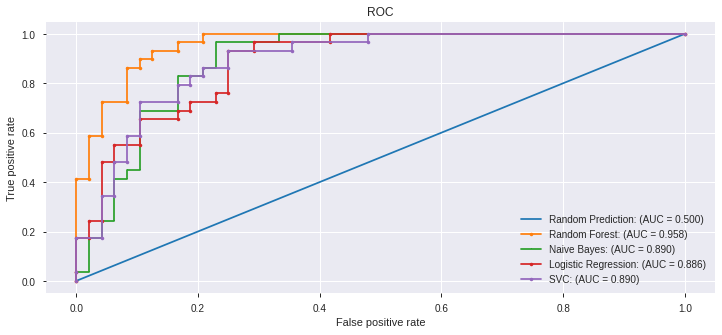

In [638]:
plt.figure(figsize=(12,5))
plt.plot(r_fpr, r_tpr, linestyle='-', label='Random Prediction: (AUC = %.3f)' % r_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest: (AUC = %.3f)' % rfc_auc)
plt.plot(nb_fpr, nb_tpr, marker=',', label='Naive Bayes: (AUC = %.3f)' % nb_auc)
plt.plot(logmodel_fpr, logmodel_tpr, marker='.', label='Logistic Regression: (AUC = %.3f)' % logmodel_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC: (AUC = %.3f)' % svc_auc)
plt.title('ROC')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

As seen above, Random Forest classifier overcome all of the other methods with great advantage. Choosing a FPR lower than 20%, we can do predictions with precision close to 100%. If this model could be implemented on a Brazilian database, using national patients, we could get pretty good, widely available and <b>cost zero</b> predictions of Diabetes future onset on our population, as the results we got in this database.


<b>Diabetes is one of the most expensive diseases in brazilian public healthcare system</b>. Every year it takes a lot of lives due to complications and has a massive direct financial outgoing with hospitalization as well as indirect lost with ill-founded people that are deemed to stop working.

# 9. Getting Pickle Files from the Standardizing method and trained SVC model

In [640]:
import pickle

In [642]:
pickle.dump(rfc, open('randomforest.pkl', 'wb'))
pickle.dump(std, open('standardizer.pkl', 'wb'))

# 10. Deploying the Diabetes Predictor App
Consult the Web App link of the deployed model to consult your patients likelihood of deve